## Biological Background on the Dataset and Motivations

This dataset contains data from an analysis of invasive breast cancer carcinoma.Since this is a subject I wasn't very familiar with but wanted to explore and use for this project. To better understand the biological context, I consulted review papers and online summaries of these concepts.Below is a description from the source of the dataset followed by some definitions of the molecular 4 main features called "omics" or the molecular layers of tumor samples involved in the breast cancer study. This information is to give insight into what the data means and helps with cross feature selection for modeling.

**Analysis**

The multi-omics data from breast invasive carcinoma project of The Cancer Genome Atlas (TCGA) is downloaded and analyzed. A subset of the data is chosen according to the clinical information of the patients.

**Kaggle Description and Motivations**

There are 705 breast cancer samples. The dataset contains four different omics data types (1936 features in total).

 - cn: copy number variations (n=860)
 - mu: mutations (n=249)
 - rs: gene expression (n=604)
 - pp: protein levels (n=223)

What type of multi-omics prediction models can we build?
Where are the strengths/weaknesses of different methods?
Can we show why it is meaningful to integrate different data types?

**Summary of the omic data**

The information are generated descriptions summaries of the omic data

**Omic Categories** 
Each omics modality has extremely high dimensionality (thousands of genes or protein 
measurements) but represents very different biological processes:

- CNVs → genomic structural variation  
- Mutations → discrete genetic alterations  
- RNA → continuous transcriptional activity  
- Protein → downstream functional abundance  

**Copy Number Variation (CNV):**  
CNVs represent large chromosomal gains or losses. High CNV burden is a hallmark of genomic 
instability and strongly influences downstream RNA and protein levels (Beroukhim et al., 2010; 
Taylor et al., 2018). CNVs often drive oncogene amplification or tumor suppressor deletions.

**Mutation Burden:**  
Mutations alter protein-coding regions directly. Tumors with mutation-dominant profiles are 
driven more by point mutations than by large-scale genomic alterations (Vogelstein et al., 2013).

**RNA Expression (ExprLevelTier):**  
RNA levels reflect transcriptional activity. Because expression values span several orders of 
magnitude and contain noise, tiering them into quartiles (Q1–Q4) provides a stable categorical 
representation used widely in cancer transcriptomics (Risso et al., 2018; Subramanian et al., 2005).

**Protein Abundance:**  
Protein levels integrate upstream signals from CNV, mutation, and RNA processes. Proteomics often 
reveals post-transcriptional and post-translational regulation not visible at the RNA level 
(Aebersold & Mann, 2016).

**OmicDominant:**  
This variable indicates which molecular layer is most influential in the sample (CNV vs Mutation 
vs RNA vs Protein). Multi-omic studies show that tumors cluster by the dominant modality driving 
their biology (Hoadley et al., 2014; Cheng et al., 2013).

The categories (OmicDominant, ExprLevelTier, CNVLoadTier) that will be used in the feature engineering portion of the project are not in the original dataset but are categories that will be added based on the recommendations from the cited papers on multi-omics studies. This will allow the model to extract meaningful structure in the original data that makes sense biologically.

### Kaggle Dataset
https://www.kaggle.com/datasets/samdemharter/brca-multiomics-tcga?select=brca_data_w_subtypes.csv



### Biological References

Taylor, A.M., et al. (2018). *Genomic and Functional Approaches to Understanding Cancer Aneuploidy*. Cancer Cell, 33(4), 676–689. https://doi.org/10.1016/j.ccell.2018.03.007

Beroukhim, R., et al. (2010). *The landscape of somatic copy-number alteration across human cancers*. Nature, 463, 899–905. https://doi.org/10.1038/nature08822

Hoadley, K.A., et al. (2014). *Multiplatform Analysis of 12 Cancer Types Reveals Molecular Classification Across Tissues*. Cell, 158(4), 929–944. https://doi.org/10.1016/j.cell.2014.06.049

Cheng, Y., et al. (2013). *Integrative analysis of multi-omics data*. Nature Reviews Genetics, 14, 715–728. https://doi.org/10.1038/nrg3646

Subramanian, A., et al. (2005). *Gene Set Enrichment Analysis*. PNAS, 102(43), 15545–15550. https://doi.org/10.1073/pnas.0506580102

Risso, D., et al. (2018). *Normalization of RNA-seq data*. Nature Reviews Genetics, 19, 140–150. https://doi.org/10.1038/nrg.2017.76

Vogelstein, B., et al. (2013). *Cancer Genome Landscapes*. Science, 339, 1546–1558. https://doi.org/10.1126/science.1235122

Li, L., et al. (2017). *Comprehensive multi-omics analysis*. Nature Communications, 8, 1428. https://doi.org/10.1038/s41467-017-01520-w

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

df = pd.read_csv('data/brca_data_w_subtypes.csv')
print("Dataset Shape: ", df.shape)
print("Dataset Columns: ", df.columns[:12])
display(df.head())
df.info()

Dataset Shape:  (705, 1941)
Dataset Columns:  Index(['rs_CLEC3A', 'rs_CPB1', 'rs_SCGB2A2', 'rs_SCGB1D2', 'rs_TFF1',
       'rs_MUCL1', 'rs_GSTM1', 'rs_PIP', 'rs_ADIPOQ', 'rs_ADH1B', 'rs_S100A7',
       'rs_HMGCS2'],
      dtype='object')


,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status,PR.Status,ER.Status,HER2.Final.Status,histological.type
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0,Positive,Positive,Negative,infiltrating ductal carcinoma
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,0.279067,0.292925,-0.155242,-0.089365,0.267530,0,Positive,Negative,Negative,infiltrating ductal carcinoma
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0,Positive,Positive,Negative,infiltrating ductal carcinoma
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0,Positive,Positive,Negative,infiltrating ductal carcinoma
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0,Positive,Positive,Negative,infiltrating ductal carcinoma


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 1941 entries, rs_CLEC3A to histological.type
dtypes: float64(827), int64(1110), object(4)
memory usage: 10.4+ MB


## Dataset Attributes

**Dataset shape:** 705 samples × 1,941 total features

**Column indexes:** <b>rs_CLEC3A, rs_CPB1, rs_SCGB2A2, rs_SCGB1D2, rs_TFF1</b>
(These columns are referring to RNA gene expression features with each one prefixed with rs_)

**4 Object Types and Descriptions**

These 4 are Categorical Clinical Pathology Annotations 
(ChatGTP Generated from the source material for understanding)

 - PR.Status: `PR = Progesterone Receptor`
    - Values usually like: Positive, Negative, Indeterminate
    - Indicates whether tumor cells express progesterone hormone receptors
    - Important for breast cancer subtype classification and treatment selection
    - PR+ tumors tend to respond better to hormone therapies

- ER.Status: `ER = Estrogen Receptor`
    - Values: Positive, Negative, Indeterminate
    - One of the most important biomarkers in breast cancer
    - ER+ tumors depend on estrogen signaling
    - Determines treatment and prognosis

- HER2.Final.Status: `HER2 = Human Epidermal Growth Factor Receptor 2`
    - Values: HER2+, HER2−, maybe Equivocal
    - HER2 overexpression/amplification marks a highly aggressive subtype
    - HER2+ tumors respond strongly to targeted therapies

- histological.type: `Pathology-based Tissue Subtype`
    - Values: IDC infiltrating ductal carcinoma, ILC Invasive Lobular Carcinoma
    - morphological category of the tumor under the microscope
    - Used as a classification label describing tumor histology

I needed help with the descriptions since I was unfamiliar with what the features meant. This also helps the reader to understand the data and how the data preparation deals with them.

In [2]:
# Adding omic categories and summaries
df_original = df.copy()

# classification task named as Pathology-based Tissue Subtype
# predicts the tumor histology and can drive treatment
df["Subtype"] = df["histological.type"]

# Compute summaries the omic features
# This will feed into the OmicDominant and tiers
df['cn_sum'] = df.filter(like='cn_').sum(axis=1)
df['mu_sum'] = df.filter(like='mu_').sum(axis=1)
df['rs_sum'] = df.filter(like='rs_').sum(axis=1)
df['pp_sum'] = df.filter(like='pp_').sum(axis=1)


# Normalizing the omic numeric data since OmicDominant values in (rs_) 
# or RNA expression is dominating over the FeatureSpace
df["cn_norm"] = (df["cn_sum"] - df["cn_sum"].mean()) / df["cn_sum"].std()
df["mu_norm"] = (df["mu_sum"] - df["mu_sum"].mean()) / df["mu_sum"].std()
df["rs_norm"] = (df["rs_sum"] - df["rs_sum"].mean()) / df["rs_sum"].std()
df["pp_norm"] = (df["pp_sum"] - df["pp_sum"].mean()) / df["pp_sum"].std()


df['OmicDominant'] = df[['cn_norm', 'mu_norm', 'rs_norm', 'pp_norm']].idxmax(axis=1)

# Renaming for clarity
dominant_map = {
    "cn_norm": "CNV",
    "mu_norm": "Mutation",
    "rs_norm": "RNA",
    "pp_norm": "Protein"
}
df["OmicDominant"] = df["OmicDominant"].map(dominant_map)


df["CNVLoad"] = df['cn_sum']
df['CNVLoadTier'] = pd.qcut(df['CNVLoad'],q=3, labels=['Low', 'Medium', 'High'])

df['ExprLevel'] = df['rs_sum']
df['ExprLevelTier'] = pd.qcut(df['ExprLevel'],q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Saving Categories before data cleaning
df_categories = df[[
    'OmicDominant',
    'CNVLoadTier',
    'ExprLevelTier',
    'Subtype'
]].copy()

df_categories.head()

,OmicDominant,CNVLoadTier,ExprLevelTier,Subtype
0,CNV,High,Q4,infiltrating ductal carcinoma
1,Mutation,Medium,Q2,infiltrating ductal carcinoma
2,CNV,High,Q3,infiltrating ductal carcinoma
3,Protein,Medium,Q2,infiltrating ductal carcinoma
4,Protein,Medium,Q3,infiltrating ductal carcinoma


## Data Cleaning 

I want to remove all the non-numeric and non-omic data to retain the most meaningful molecular data for the network. The clinical categorical data such as ER, PR, HER2, and histological.type will be excluded as they don't provide any predictive value. Zero variance variables will be removed since they don't provide informative signal to the model as such an omic column with all zeros. After cleaning only the omic numeric columns will be left for PCA. 

In [3]:
clean_df = df.copy()

# Drop null values
clean_df = clean_df.dropna(axis=0)

# Clinical variables to remove 
# Only the created categories will be left
clinical_cols = [
    "vital.status",
    "PR.Status",
    "ER.Status",
    "HER2.Final.Status",
    "histological.type"
]

clean_df.drop(columns=[c for c in clinical_cols if c in clean_df], inplace=True, errors='ignore')

allowed_object_cols = ["OmicDominant", "CNVLoadTier", "ExprLevelTier", "Subtype"]

non_num_cols = [c for c in clean_df.select_dtypes(include='object').columns if c not in   allowed_object_cols]

clean_df.drop(columns=non_num_cols, inplace=True)

clean_df = clean_df.loc[:, clean_df.nunique() > 1]

omic_prefixes = ['rs_','mu_','pp_','cn_']
omic_cols = [c for c in clean_df.columns if any(c.startswith(p) for p in omic_prefixes)]

omics_df = clean_df[omic_cols].copy()

print(f'Clean data with omic cleaning: {omics_df.shape}')

print("Columns after cleaning:", len(clean_df.columns))
print(clean_df.head())

Clean data with omic cleaning: (560, 1944)
Columns after cleaning: 1950
   rs_CLEC3A    rs_CPB1  rs_SCGB2A2  rs_SCGB1D2    rs_TFF1   rs_MUCL1  \
0   0.892818   6.580103   14.123672   10.606501  13.189237   6.649466   
1   0.000000   3.691311   17.116090   15.517231   9.867616   9.691667   
2   3.748150   4.375255    9.658123    5.326983  12.109539  11.644307   
3   0.000000  18.235519   18.535480   14.533584  14.078992   8.913760   
4   0.000000   4.583724   15.711865   12.804521   8.881669   8.430028   

    rs_GSTM1     rs_PIP  rs_ADIPOQ   rs_ADH1B  ...     pp_sum   cn_norm  \
0  10.520335  10.338490  10.248379  10.229970  ...  10.840141  1.542886   
1   8.179522   7.911723   1.289598   1.818891  ...  15.760821  0.235513   
2  10.517330   5.114925  11.975349  11.911437  ...  12.081610  2.410021   
3  10.557465  13.304434   8.205059   9.211476  ...  23.170004 -0.064650   
4  12.964607   6.806517   4.294341   5.385714  ...   7.583219 -0.151363   

    mu_norm   rs_norm   pp_norm  OmicD

## PCA Variance Analysis (omics)

The dataset contains 1,941 molecular features and only 705 samples making the number of features much greater than the samples. This can be challenging in training a neural network due to noisy data, with 1000+ expression features and 100s Copy Number Variation (CNV) observations. Also, there is a risk of overfitting as the network can memorize the training data affecting generalization. 

The 1,941 features come from the omic modalities categories described earlier with each of them being on different scales and variance. For that reason dimensionality reduction must be performed within each one separately. But before PCA is performed there needs to be some verification of the amount of variance captured. Im hoping for at least 80% variance capture across omic components.


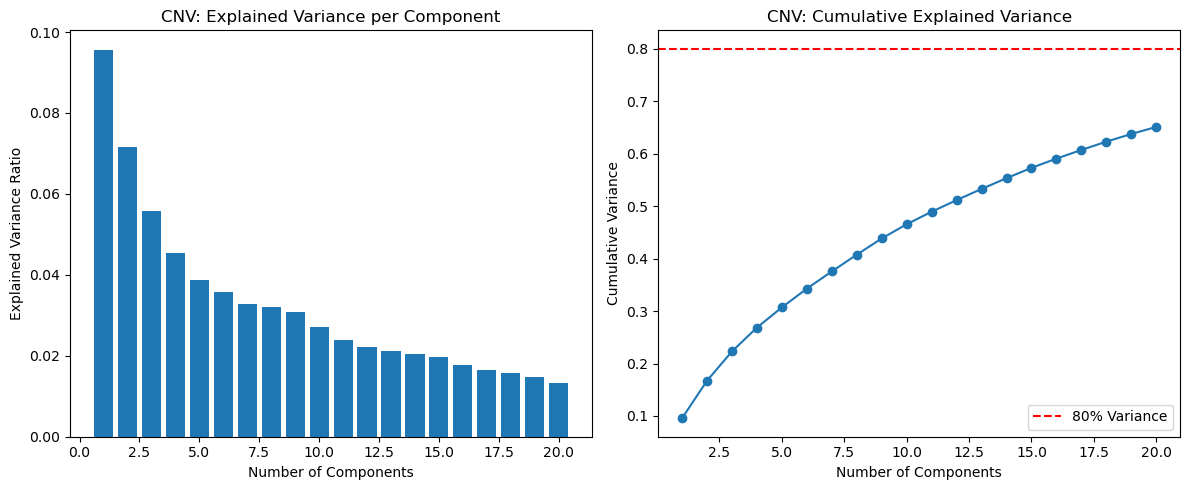

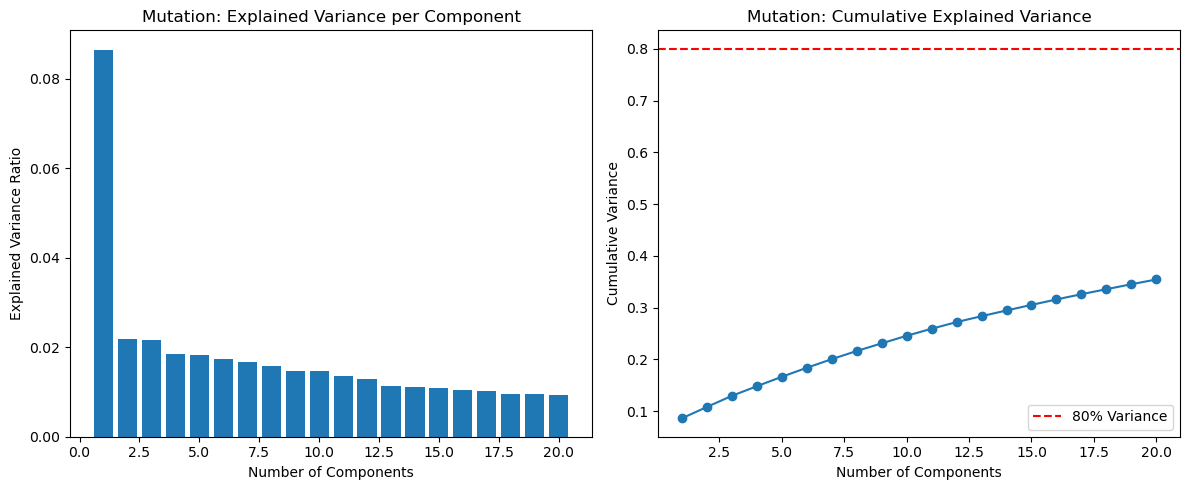

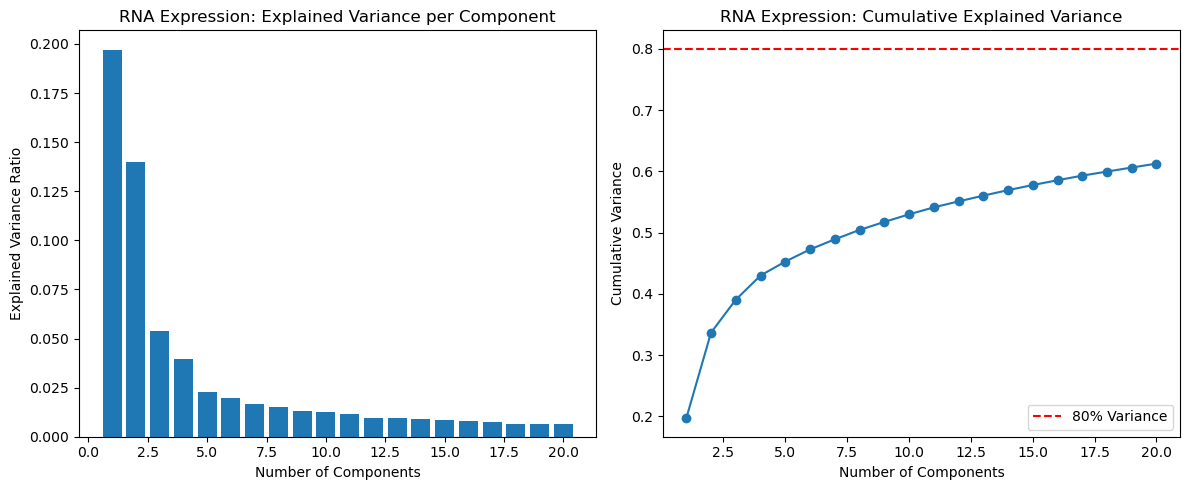

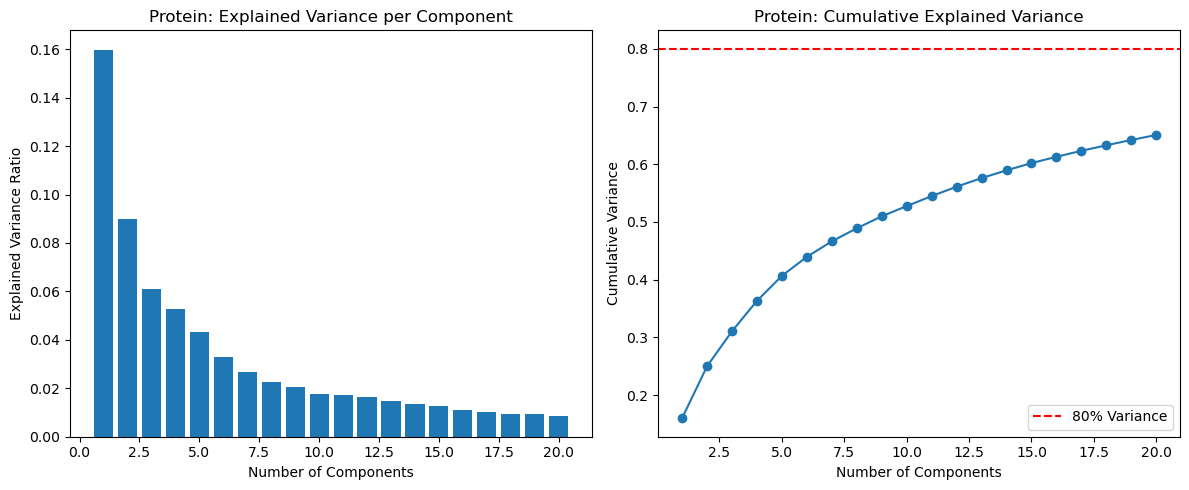

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting for each omic feature
def pca_plot(df_input, cols, feature_name, max_components=20):
    X = df_input[cols].to_numpy().astype(np.float32)
    scaled_X = StandardScaler().fit_transform(X)
    
    pca = PCA(n_components=min(max_components, scaled_X.shape[1]), random_state=42)
    pca.fit(scaled_X)
    
    explained_variance = pca.explained_variance_ratio_
    cumulative = np.cumsum(explained_variance)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance)
    plt.title(f"{feature_name}: Explained Variance per Component")
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative) + 1), cumulative, marker='o')
    plt.axhline(0.8, color='red', linestyle='--',label='80% Variance')
    plt.title(f"{feature_name}: Cumulative Explained Variance")
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

# Getting the omic cols from the cleaned dataset
cn_cols = [c for c in omics_df.columns if c.startswith("cn_")]
mu_cols = [c for c in omics_df.columns if c.startswith("mu_")]
rs_cols = [c for c in omics_df.columns if c.startswith("rs_")]
pp_cols = [c for c in omics_df.columns if c.startswith("pp_")]

pca_plot(omics_df, cn_cols, "CNV")
pca_plot(omics_df, mu_cols, "Mutation")
pca_plot(omics_df, rs_cols, "RNA Expression")
pca_plot(omics_df, pp_cols, "Protein")

Selected dimensionality for each omic feature:

   - 5 -> CVN
   - 2 -> Mutation
   - 5 -> RNA Expression
   - 3 -> Protein

The PCA scree plot for each feature show elbow points at each value confirming that anything after this value would provide diminishing returns. 

In [5]:
# Final PCA Reduced dataset

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def pca_scale(df_input, cols, name, max_components):
    X = df_input[cols].to_numpy().astype(np.float32)
    scaled_X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=max_components, random_state=42).fit_transform(scaled_X)
    feature_names = [f"{name}pc{i}" for i in range(max_components)]
    return pd.DataFrame(pca, columns=feature_names, index=df_input.index)
    

cn_pca = pca_scale(omics_df, cn_cols, "cn_", 5)
mu_pca = pca_scale(omics_df, mu_cols, "mu_", 2)
rs_pca = pca_scale(omics_df, rs_cols, "rs_", 5)
pp_pca = pca_scale(omics_df, pp_cols, "pp_", 3)

# Combining features
X_pca = pd.concat([cn_pca, mu_pca, rs_pca, pp_pca], axis=1)
print("New PCA feature shape", X_pca.shape)

df_categories_align = df_categories.loc[X_pca.index]

# Categorical features
X_pca["OmicDominant"]  = df_categories_align["OmicDominant"]
X_pca["CNVLoadTier"]   = df_categories_align["CNVLoadTier"]
X_pca["ExprLevelTier"] = df_categories_align["ExprLevelTier"]

for col in ["OmicDominant", "CNVLoadTier", "ExprLevelTier"]:
    X_pca[col] = X_pca[col].astype(str)
    
# Target
y = df_categories_align["Subtype"].astype('category').cat.codes

n_classes = y.nunique()

print("Number of classes:", n_classes)
X_pca.head()

New PCA feature shape (560, 15)
Number of classes: 2


,cn_pc0,cn_pc1,cn_pc2,cn_pc3,cn_pc4,mu_pc0,mu_pc1,rs_pc0,rs_pc1,rs_pc2,rs_pc3,rs_pc4,pp_pc0,pp_pc1,pp_pc2,OmicDominant,CNVLoadTier,ExprLevelTier
0,0.284563,13.838800,-3.972135,3.597519,1.823271,-0.986599,1.537199,1.159987,9.245478,4.493155,1.639011,-1.008282,-2.405822,-1.434208,-0.007568,CNV,High,Q4
1,-0.003128,0.320317,3.717815,-2.275590,-2.268269,2.306738,-2.246150,-2.944531,-0.214813,5.156569,2.474977,-0.266998,-1.223121,-1.946129,3.518156,Mutation,Medium,Q2
2,9.170381,14.655410,7.180854,-1.412863,4.858715,-2.245258,0.133760,3.582202,7.104290,-2.884461,0.576415,2.889609,-0.570963,-1.992587,-1.558178,CNV,High,Q3
3,-2.826180,0.428501,-1.379567,-5.916168,6.917509,-1.754391,0.508897,-6.555562,6.226030,-2.528461,3.422283,4.728698,-3.054816,-2.407680,-2.668188,Protein,Medium,Q2
4,2.820574,0.727730,-3.156204,4.791732,-5.740403,-1.128390,-0.450556,-7.366039,5.596481,3.609381,2.433203,-2.418091,2.028596,-1.033469,1.974869,Protein,Medium,Q3


## Final Dataset Description Used for Modeling

### **Numeric PCA-Reduced Features**

The raw dataset had 1,900 omic features spread across the four molecular layers:
 - **Copy Number Variation cn_**
 - **Mutation Load mu_**
 - **RNA expression rs_**
 - **Protein Abundance pp_**

These were PCA reduced separately using the variance elbow method to address the imbalance of the samples versus the predictive variables

 - **CNV Components -> 5**
 - **Mutation Components -> 2**
 - **RNA Components -> 5**
 - **Protein Components -> 3**

This gives me 15 numeric features to summarize molecular layer activity across the dataset and prevent overfitting.

Lastly, three categorical variables were added based on methods in the cited papers for this project (Hoadley et al., 2014; Beroukhim et al., 2010; Aebersold 
& Mann, 2016). Specifics for these categories are described in the data background section. 

 - **OmicDominant**  
 - **CNVLoadTier** 
 - **ExprLevelTier** 

These categories can summarize the numeric data into signals the model can learn from.

### **Target Variable**

The classification target is 
    - **Subtype**: this is derived from the **histological.type** variable from the raw dataset
    
This represents the **pathology-based tissue subtype** a label used in preventative oncology. This is treated as the multi-class classification target.

## Train/Test Splitting Strategy
I will use Stratified K-Fold Cross-Validation with 5 folds. Stratification is important in this case since the subtypes aren't perfectly balanced and normal K-Fold splitting could generate some folds where some subtypes aren't represented. Stratified would ensure that each fold had roughly the same distribution which produces a more stable and fair assessment.

5 folds will be used for the spilt since the dataset sample space is much smaller after cleaning at only 560 patient samples. Cross-validation makes better use this limited data and reduces the chance a result depends on one good split.


This splitting reflects how the model would perform in practice. In real clinical setting, the model would encounter new patients whose subtypes distribution would probably match the broader population more and not a subset or skewed dataset. Stratified Cross-Validation can mimic this by showing the model multiple test/train partitions giving a better estimate of real world performance.

In [7]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Printing to visualize the fold sizes
for fold, (train_idx, test_idx) in enumerate(kfold.split(X_pca, y)):
    print(f"Fold {fold+1}: train={len(train_idx)}, test={len(test_idx)}")
    
train_idx, test_idx = next(iter(kfold.split(X_pca, y)))

X_train, X_test = X_pca.iloc[train_idx], X_pca.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

Fold 1: train=448, test=112
Fold 2: train=448, test=112
Fold 3: train=448, test=112
Fold 4: train=448, test=112
Fold 5: train=448, test=112


The generated folds confirms that 5 splits of the data gives:
    - 80% training with 448 samples
    - 20% testing with 112 samples

The proportions of the subtypes same the same across all folds.

## Cross-Product Feature Design and Justification

To capture the biological meaning between the omic data types, the cross-product features chosen are based on the recommendations from the multi-omic studies from the source papers on breast cancer oncology. The categorical crosses created from the pre-processing steps are below:

   - **OmicDominant x CNVLoadTier**
   - **OmicDominant x ExprLevelTier**
   - **CNVLoadTier x ExprLevelTier**

The crosses are motivated by the cancer studies showing that the molecular omic layers don't act independently.

Beroukhim et al. (2010) concluded that "copy-number alterations are ubiquitous in human cancers and can be a major driving force shaping tumor behavior and progression", supporting the interactions involving CNVLoadTier. 

Hoadley et al. (2014) also said that "copy-number changes do not always correlate with gene expression levels," this could indicate that the CNV and RNA omic features can become uncorrelated in certain situations justifying the OmicDominant x ExprLevelTier and CNVLoadTier x ExprLevelTier crosses. 

Aebersold & Mann (2016) noted this observation about the protein levels, "proteomic measurements frequently reveal pathway activity and regulatory events not observable at the genomic or transcriptomic level," I interpreted this as the omic features must be modeled together and not separately to extract information to predict the targeted label.

In [8]:
def create_dataset_from_dataframe(X, y, batch_size=64):
    
    feature_dict = {}
    for col in X.columns:
        vals = X[col].values[:, None]
        if col in categorical_headers:
            feature_dict[col] = tf.constant(vals, dtype=tf.string)
        else:
            feature_dict[col] = tf.constant(vals.astype(np.float32), dtype=tf.float32)

    ds = tf.data.Dataset.from_tensor_slices((feature_dict, y.values))
    ds = ds.batch(batch_size, drop_remainder=True)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

In [9]:
from keras.src.layers.preprocessing.feature_space import FeatureSpace
import tensorflow as tf
from tensorflow import keras
import os

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

categorical_headers = ["OmicDominant", "CNVLoadTier", "ExprLevelTier"]
for col in categorical_headers:
    X_pca[col] = X_pca[col].astype(str)

# labels MUST be int32
y = y.astype("int32")

numerical_headers = [c for c in X_pca.columns if c not in categorical_headers]

train_ds = create_dataset_from_dataframe(X_train, y_train)
val_ds   = create_dataset_from_dataframe(X_test,  y_test)

feature_space = FeatureSpace(
    features={
        "OmicDominant":  FeatureSpace.string_categorical(num_oov_indices=0, output_mode="int"),
        "CNVLoadTier":   FeatureSpace.string_categorical(num_oov_indices=0, output_mode="int"),
        "ExprLevelTier": FeatureSpace.string_categorical(num_oov_indices=0, output_mode="int"),

        **{col: FeatureSpace.float_normalized() for col in numerical_headers}
    },

    crosses=[
        FeatureSpace.cross(("OmicDominant", "CNVLoadTier"), crossing_dim=12,  output_mode="int"),
        FeatureSpace.cross(("OmicDominant", "ExprLevelTier"), crossing_dim=16, output_mode="int"),
        FeatureSpace.cross(("CNVLoadTier", "ExprLevelTier"),  crossing_dim=12, output_mode="int"),
    ],

    output_mode="dict"
)

# ADAPT
feature_space.adapt(train_ds.map(lambda x, y: x))

dict_inputs     = feature_space.get_inputs()
encoded_features = feature_space.get_encoded_features()

preprocessed_train_ds = train_ds.map(
    lambda x, y: (feature_space(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

preprocessed_val_ds = val_ds.map(
    lambda x, y: (feature_space(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)


Keras version:  3.12.0
Tensorflow version:  2.16.2


2025-11-16 23:51:46.935663: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-11-16 23:51:46.935822: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-16 23:51:46.935831: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-11-16 23:51:46.935871: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-16 23:51:46.935881: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-11-16 23:51:47.097945: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-16 23:51:47.211346: W

## Evaluation Metrics

This project has multi classification task where the goal is to predict breast tumor subtypes from omic data representing molecular layers of tumors. Because the classes aren't balanced accuracy alone would not be the most reliable measurement since a model with a high accuracy would just predict the most common subtype. 

So for this reason, I will be primarily choosing Macro-F1 metric. This metric will compute the F1 score for each subtype separately and averages them. It gives equal weight to common and rare classes. This is important in this dataset because all the subtypes represent a distinct biological state, so a misclassified subtype can still be significant clinically.

I can also use Macro-AUROC metric. Using AUROC the method I can measure how well the model ranks the correct subtype higher than the others. This can be useful if different subtypes require a certain sensitivity or tradeoff.

Accuracy can maybe be used as a baseline metric but not a main metric. Both Macro metrics would better capture balanced performance and reflect goal of the task, which is to do well on all the subtasks and not just the ones that are represented more in the data.

## Modeling 

In [13]:
from tensorflow.keras.layers import Dense, Activation, Input, Dropout
from tensorflow.keras.layers import Embedding, Concatenate, Flatten

### Model A: Baseline model with 2 layer deep branch 

   - Wide branch will handle the categorical embeddings
      - OmicDominant, CNVLoadTier, ExprLevelTier

   - Deep branch layers will use Dense(64) -> Dense(32)
   - Softmax will be over the subtypes

In [14]:
def setup_embedding_from_encoding_categorical(encoded_features, feature_space, col_name):
    x = encoded_features[col_name]
    vocab = feature_space.preprocessors[col_name].get_vocabulary()
    N = len(vocab)
    embed_dim = max(1, int(np.sqrt(N)))
    print(f"Category embed: {col_name} | vocab={N} → dim={embed_dim}")
    x = Embedding(
        input_dim=N,
        output_dim=embed_dim,
        name=f"{col_name}_embed")(x)
    return Flatten()(x)

def setup_embedding_from_encoding_cross(encoded_features, feature_space, cross_name):
    x = encoded_features[cross_name]
    N = feature_space.crossers[cross_name].num_bins
    embed_dim = max(1, int(np.sqrt(N)))
    print(f"Cross embed: {cross_name} | num_bins={N} → dim={embed_dim}")
    x = Embedding(input_dim=N,
        output_dim=embed_dim,
        name=f"{cross_name}_embed")(x)
    return Flatten()(x)


In [15]:
import matplotlib.pyplot as plt

def plot_training_history(history, title):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Val Loss')
    ax1.set_yscale('log')
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss (log scale)")
    ax1.legend(loc='upper right')
    ax1.set_title(title + " — Loss")
    plt.show()

In [17]:
def build_model_A(feature_space, encoded_features,
                  numerical_headers,
                  categorical_headers,
                  n_classes):

    model_inputs = {name: tensor for name, tensor in encoded_features.items()}
    wide_parts = []

    # Add cross embeddings
    for cross_name in feature_space.crossers.keys():
        wide_parts.append(
            setup_embedding_from_encoding_cross(encoded_features, feature_space, cross_name)
        )

    # Add categorical embeddings
    for col in categorical_headers:
        wide_parts.append(
            setup_embedding_from_encoding_categorical(encoded_features, feature_space, col)
        )

    wide_branch = Concatenate()(wide_parts)
    deep_parts = [encoded_features[col] for col in numerical_headers]
    deep_branch = Concatenate()(deep_parts)

    deep_branch = Dense(64, activation="relu")(deep_branch)
    deep_branch = Dense(32, activation="relu")(deep_branch)

    # Merge branches
    merged = Concatenate()([deep_branch, wide_branch])

    outputs = Dense(n_classes, activation="softmax")(merged)

    # IMPORTANT: model inputs come from feature_space.get_inputs()
    model = keras.Model(inputs=model_inputs, outputs=outputs)

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

print("Number of classes:", n_classes)
print("Numeric headers:", numerical_headers)
print("Categorical headers:", categorical_headers)

model_a = build_model_A(
    feature_space=feature_space,
    encoded_features=encoded_features,
    numerical_headers=numerical_headers,
    categorical_headers=categorical_headers,
    n_classes=n_classes
)

model_a.summary()

history_a = model_a.fit(
    preprocessed_train_ds,
    validation_data=preprocessed_val_ds,
    epochs=30,
    verbose=2
)

Number of classes: 2
Numeric headers: ['cn_pc0', 'cn_pc1', 'cn_pc2', 'cn_pc3', 'cn_pc4', 'mu_pc0', 'mu_pc1', 'rs_pc0', 'rs_pc1', 'rs_pc2', 'rs_pc3', 'rs_pc4', 'pp_pc0', 'pp_pc1', 'pp_pc2']
Categorical headers: ['OmicDominant', 'CNVLoadTier', 'ExprLevelTier']
Cross embed: OmicDominant_X_CNVLoadTier | num_bins=12 → dim=3
Cross embed: OmicDominant_X_ExprLevelTier | num_bins=16 → dim=4
Cross embed: CNVLoadTier_X_ExprLevelTier | num_bins=12 → dim=3
Category embed: OmicDominant | vocab=4 → dim=2
Category embed: CNVLoadTier | vocab=3 → dim=1
Category embed: ExprLevelTier | vocab=4 → dim=2


/Users/keenancrawford/anaconda3/envs/py3_19env/lib/python3.10/site-packages/keras/src/models/functional.py:107: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'CNVLoadTier' mapping to value <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=keras_tensor_1> which has name 'keras_tensor_1'. Change the tensor name to 'CNVLoadTier' (via `Input(..., name='CNVLoadTier')`)
  warnings.warn(
/Users/keenancrawford/anaconda3/envs/py3_19env/lib/python3.10/site-packages/keras/src/models/functional.py:107: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'ExprLevelTier' mapping to value <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=keras_tensor_2> which has name 'keras_tensor_2'. Change the tensor name to 'ExprLevelTier' (via `Input(..., name='ExprLevelTier')`)
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_3CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_4CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_5CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_6CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_7CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_8CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_9CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_10CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_11CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_12CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_13CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_14CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_15CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_16CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_17CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_18CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_19CLO… │ (None, 1)         │          0 │ -               

 Total params: 3,355 (13.11 KB)

 Trainable params: 3,355 (13.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
7/7 - 1s - 203ms/step - accuracy: 0.5067 - loss: 0.8024 - val_accuracy: 0.5938 - val_loss: 0.6501
Epoch 2/30
7/7 - 0s - 28ms/step - accuracy: 0.6049 - loss: 0.6532 - val_accuracy: 0.7188 - val_loss: 0.5516
Epoch 3/30
7/7 - 0s - 28ms/step - accuracy: 0.7232 - loss: 0.5507 - val_accuracy: 0.8438 - val_loss: 0.4790
Epoch 4/30
7/7 - 0s - 27ms/step - accuracy: 0.8393 - loss: 0.4715 - val_accuracy: 0.8906 - val_loss: 0.4198
Epoch 5/30
7/7 - 0s - 27ms/step - accuracy: 0.8839 - loss: 0.4085 - val_accuracy: 0.9219 - val_loss: 0.3711
Epoch 6/30
7/7 - 0s - 26ms/step - accuracy: 0.8973 - loss: 0.3599 - val_accuracy: 0.9219 - val_loss: 0.3314
Epoch 7/30
7/7 - 0s - 27ms/step - accuracy: 0.9129 - loss: 0.3237 - val_accuracy: 0.9219 - val_loss: 0.2989
Epoch 8/30
7/7 - 0s - 27ms/step - accuracy: 0.9129 - loss: 0.2971 - val_accuracy: 0.9219 - val_loss: 0.2722
Epoch 9/30
7/7 - 0s - 28ms/step - accuracy: 0.9107 - loss: 0.2776 - val_accuracy: 0.9219 - val_loss: 0.2505
Epoch 10/30
7/7 - 0s - 27ms

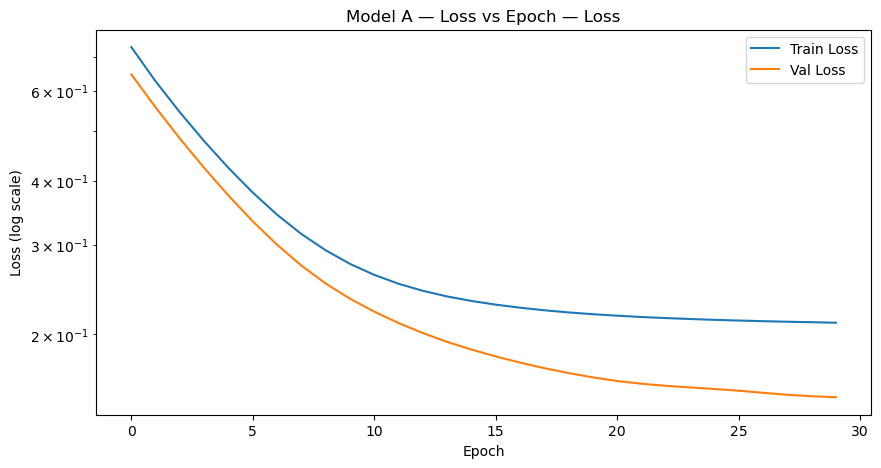

In [69]:
plot_training_history(history_a, "Model A — Loss vs Epoch")

### Model B: Model with 2 layer deep branch 

   - Wide branch will handle the categorical embeddings
      - OmicDominant, CNVLoadTier, ExprLevelTier
      - Will use larger embedding dims that model A to increase capacity

   - Deep branch layers will be deeper and wider: 
      - Dense(128) -> Dropout(0.3) -> Dense(64) -> Dropout(0.3) -> Dense(32)
   - Softmax will be over the subtypes

This model has higher trainable parameter count and has better representation in the wide and deep parts

In [18]:
def setup_embedding_from_encoding_categorical_B(encoded_features, feature_space, col_name):
    x = encoded_features[col_name]
    vocab = feature_space.preprocessors[col_name].get_vocabulary()
    N = len(vocab)
    
    # Larger embedding dimension
    embed_dim = max(2, int(2 * np.sqrt(N)))

    print(f"(Model B) Category embed: {col_name} | vocab={N} → dim={embed_dim}")

    x = Embedding(
        input_dim=N,
        output_dim=embed_dim,
        name=f"{col_name}_embed_B"
    )(x)
    x = Flatten()(x)
    return x

def setup_embedding_from_encoding_cross_B(encoded_features, feature_space, cross_name):
    x = encoded_features[cross_name]
    N = feature_space.crossers[cross_name].num_bins

    embed_dim = max(2, int(2 * np.sqrt(N)))

    print(f"(Model B) Cross embed: {cross_name} | num_bins={N} → dim={embed_dim}")

    x = Embedding(input_dim=N,
        output_dim=embed_dim,
        name=f"{cross_name}_embed_B")(x)

    x = Flatten()(x)
    return x

In [19]:
def build_model_B(feature_space,
                   encoded_features,
                   numerical_headers,
                   categorical_headers,
                   n_classes):


    model_inputs = {name: tensor for name, tensor in encoded_features.items()}
    wide_parts = []
    for cross_name in feature_space.crossers.keys():
        wide_parts.append(setup_embedding_from_encoding_cross_B(encoded_features, feature_space, cross_name))

    for col in categorical_headers:
        wide_parts.append(setup_embedding_from_encoding_categorical_B(encoded_features, feature_space, col))

    wide_branch = Concatenate()(wide_parts)

    deep_parts = []
    for col in numerical_headers:
        deep_parts.append(encoded_features[col])

    deep_branch = Concatenate()(deep_parts)

    deep_branch = Dense(128, activation="relu")(deep_branch)
    deep_branch = Dropout(0.3)(deep_branch)

    deep_branch = Dense(64, activation="relu")(deep_branch)
    deep_branch = Dropout(0.3)(deep_branch)

    deep_branch = Dense(32, activation="relu")(deep_branch)
    merged = Concatenate()([deep_branch, wide_branch])
    outputs = Dense(n_classes, activation="softmax")(merged)
    model = keras.Model(inputs=model_inputs, outputs=outputs)

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [20]:
model_b = build_model_B(
    feature_space=feature_space,
    encoded_features=encoded_features,
    numerical_headers=numerical_headers,
    categorical_headers=categorical_headers,
    n_classes=n_classes
)

model_b.summary()

history_b = model_b.fit(
    preprocessed_train_ds,
    validation_data=preprocessed_val_ds,
    epochs=30,
    verbose=2
)

(Model B) Cross embed: OmicDominant_X_CNVLoadTier | num_bins=12 → dim=6
(Model B) Cross embed: OmicDominant_X_ExprLevelTier | num_bins=16 → dim=8
(Model B) Cross embed: CNVLoadTier_X_ExprLevelTier | num_bins=12 → dim=6
(Model B) Category embed: OmicDominant | vocab=4 → dim=4
(Model B) Category embed: CNVLoadTier | vocab=3 → dim=3
(Model B) Category embed: ExprLevelTier | vocab=4 → dim=4


/Users/keenancrawford/anaconda3/envs/py3_19env/lib/python3.10/site-packages/keras/src/models/functional.py:107: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'CNVLoadTier' mapping to value <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=keras_tensor_1> which has name 'keras_tensor_1'. Change the tensor name to 'CNVLoadTier' (via `Input(..., name='CNVLoadTier')`)
  warnings.warn(
/Users/keenancrawford/anaconda3/envs/py3_19env/lib/python3.10/site-packages/keras/src/models/functional.py:107: UserWarning: When providing `inputs` as a dict, all keys in the dict must match the names of the corresponding tensors. Received key 'ExprLevelTier' mapping to value <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=keras_tensor_2> which has name 'keras_tensor_2'. Change the tensor name to 'ExprLevelTier' (via `Input(..., name='ExprLevelTier')`)
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_3CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_4CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_5CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_6CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_7CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_8CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_9CLONE │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_10CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_11CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_12CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_13CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_14CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_15CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_16CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_17CLO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 15)        │          0 │ keras_tensor_3CL… │
│ (Concatenate)       │                   │            │ keras_tensor_4CL… │
│                     │                   │            │ keras_tensor_5CL… │
│                     │                   │            │ keras_tensor_6CL

 Total params: 12,825 (50.10 KB)

 Trainable params: 12,825 (50.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
7/7 - 2s - 271ms/step - accuracy: 0.6004 - loss: 0.7271 - val_accuracy: 0.7656 - val_loss: 0.5091
Epoch 2/30
7/7 - 0s - 33ms/step - accuracy: 0.7031 - loss: 0.5698 - val_accuracy: 0.8906 - val_loss: 0.4277
Epoch 3/30
7/7 - 0s - 34ms/step - accuracy: 0.7879 - loss: 0.4931 - val_accuracy: 0.9531 - val_loss: 0.3636
Epoch 4/30
7/7 - 0s - 34ms/step - accuracy: 0.8504 - loss: 0.4119 - val_accuracy: 0.9531 - val_loss: 0.3027
Epoch 5/30
7/7 - 0s - 31ms/step - accuracy: 0.8371 - loss: 0.3866 - val_accuracy: 0.9375 - val_loss: 0.2592
Epoch 6/30
7/7 - 0s - 31ms/step - accuracy: 0.8795 - loss: 0.3406 - val_accuracy: 0.9375 - val_loss: 0.2326
Epoch 7/30
7/7 - 0s - 31ms/step - accuracy: 0.8906 - loss: 0.2927 - val_accuracy: 0.9375 - val_loss: 0.2128
Epoch 8/30
7/7 - 0s - 31ms/step - accuracy: 0.9085 - loss: 0.2973 - val_accuracy: 0.9375 - val_loss: 0.1986
Epoch 9/30
7/7 - 0s - 35ms/step - accuracy: 0.8839 - loss: 0.2748 - val_accuracy: 0.9375 - val_loss: 0.1892
Epoch 10/30
7/7 - 0s - 33ms

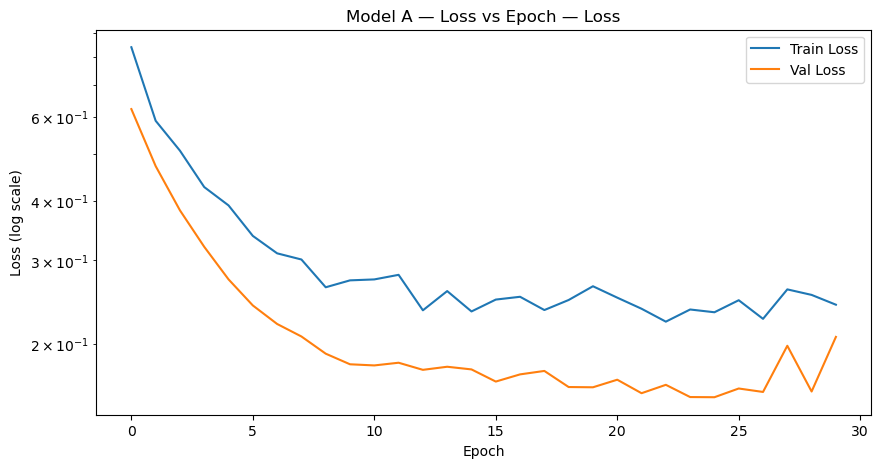

In [75]:
plot_training_history(history_b,"Model A — Loss vs Epoch")

### Model C: Model with 2 layer deep branch 

   - Wide branch has simplified categorical representation
      - Uses only the basic categorical embeddings
      - None of these features will be crossed: OmicDominant, CNVLoadTier, ExprLevelTier
      - This will force the model to learn the relationships internally

   - Deep branch layers will be deeper and wider: 
      - Dense(128) -> Dense(64) -> Dense(32)
            - No dropout will be used 
   - Softmax will still be over the subtypes
   
Im expecting a lower parameter count and weaker performance if the crosses were really meaningful to the model
The question in this case is if cross features improve generalization.

In [21]:
def create_dataset_C(X, y, batch_size=64):
    feature_dict = {}

    for col in X.columns:
        vals = X[col].values[:, None]

        if col in categorical_headers:
            feature_dict[col] = vals.astype(str)
        else:
            feature_dict[col] = vals.astype(np.float32)

    ds = tf.data.Dataset.from_tensor_slices((feature_dict, y.values))
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds_C = create_dataset_C(X_train, y_train)
val_ds_C   = create_dataset_C(X_test, y_test)

In [22]:
feature_space_C = FeatureSpace(
    features={
        "OmicDominant": FeatureSpace.string_categorical(num_oov_indices=0, output_mode="int"),
        "CNVLoadTier": FeatureSpace.string_categorical(num_oov_indices=0, output_mode="int"),
        "ExprLevelTier": FeatureSpace.string_categorical(num_oov_indices=0, output_mode="int"),
        **{col: FeatureSpace.float_normalized() for col in numerical_headers}
    },
    output_mode="dict"
)

feature_space_C.adapt(train_ds_C.map(lambda x, y: x))

2025-11-16 23:53:18.149784: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-16 23:53:18.187184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-16 23:53:18.222915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-16 23:53:18.277931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-16 23:53:18.328646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-16 23:53:18.374080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-16 23:53:18.421972: W tensorflow/core/framework/local_rendezvous.cc:404] L

In [23]:
preprocessed_train_ds_C = train_ds_C.map(
    lambda x, y: (feature_space_C(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

preprocessed_val_ds_C = val_ds_C.map(
    lambda x, y: (feature_space_C(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

In [24]:
def build_model_C(feature_space, encoded_features, numerical_headers, categorical_headers, n_classes):

    wide_parts = []
    for col in categorical_headers:
        wide_parts.append(
            setup_embedding_from_encoding_categorical(
                encoded_features, feature_space, col
            )
        )
    wide_branch = Concatenate()(wide_parts)
    deep_parts = [encoded_features[col] for col in numerical_headers]
    deep_branch = Concatenate()(deep_parts)

    deep_branch = Dense(128, activation="relu")(deep_branch)
    deep_branch = Dense(64, activation="relu")(deep_branch)
    deep_branch = Dense(32, activation="relu")(deep_branch)
    merged = Concatenate()([deep_branch, wide_branch])
    outputs = Dense(n_classes, activation="softmax")(merged)

    model = keras.Model(
        inputs=feature_space.get_inputs(),
        outputs=outputs,
        name="Model_C_No_Crosses"
    )

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

encoded_C = feature_space_C.get_encoded_features()

model_c = build_model_C(
    feature_space=feature_space_C,
    encoded_features=encoded_C,
    numerical_headers=numerical_headers,
    categorical_headers=categorical_headers,
    n_classes=n_classes
)

model_c.summary()

history_c = model_c.fit(
    preprocessed_train_ds_C,
    validation_data=preprocessed_val_ds_C,
    epochs=30,
    verbose=2
)


Category embed: OmicDominant | vocab=4 → dim=2
Category embed: CNVLoadTier | vocab=3 → dim=1
Category embed: ExprLevelTier | vocab=4 → dim=2


Model: "Model_C_No_Crosses"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ cn_pc0 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cn_pc1 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cn_pc2 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cn_pc3 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cn_pc4 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mu_pc0 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mu_pc1 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rs_pc0 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rs_pc1 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rs_pc2 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rs_pc3 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rs_pc4 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pp_pc0 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pp_pc1 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pp_pc2 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ cn_pc0[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ cn_pc1[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ cn_pc2[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ cn_pc3[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ cn_pc4[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_2… │ (None, 1)         │          3 │ mu_pc0[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_2… │ (None, 1)         │          3 │ mu_pc1[0][0]    

 Total params: 12,524 (48.98 KB)

 Trainable params: 12,479 (48.75 KB)

 Non-trainable params: 45 (240.00 B)

Epoch 1/30


/Users/keenancrawford/anaconda3/envs/py3_19env/lib/python3.10/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: {'CNVLoadTier': 'CNVLoadTier', 'ExprLevelTier': 'ExprLevelTier', 'OmicDominant': 'OmicDominant', 'cn_pc0': 'cn_pc0', 'cn_pc1': 'cn_pc1', 'cn_pc2': 'cn_pc2', 'cn_pc3': 'cn_pc3', 'cn_pc4': 'cn_pc4', 'mu_pc0': 'mu_pc0', 'mu_pc1': 'mu_pc1', 'pp_pc0': 'pp_pc0', 'pp_pc1': 'pp_pc1', 'pp_pc2': 'pp_pc2', 'rs_pc0': 'rs_pc0', 'rs_pc1': 'rs_pc1', 'rs_pc2': 'rs_pc2', 'rs_pc3': 'rs_pc3', 'rs_pc4': 'rs_pc4'}
Received: inputs={'CNVLoadTier': 'Tensor(shape=(None, 1))', 'ExprLevelTier': 'Tensor(shape=(None, 1))', 'OmicDominant': 'Tensor(shape=(None, 1))', 'cn_pc0': 'Tensor(shape=(None, 1))', 'cn_pc1': 'Tensor(shape=(None, 1))', 'cn_pc2': 'Tensor(shape=(None, 1))', 'cn_pc3': 'Tensor(shape=(None, 1))', 'cn_pc4': 'Tensor(shape=(None, 1))', 'mu_pc0': 'Tensor(shape=(None, 1))', 'mu_pc1': 'Tensor(shape=(None, 1))'

UnimplementedError: Graph execution error:

Detected at node Model_C_No_Crosses_1/Cast defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNIMPLEMENTED:  Cast int64 to string is not supported
	 [[{{node Model_C_No_Crosses_1/Cast}}]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_multi_step_on_iterator_26241]

Category embed: OmicDominant | vocab=4 → dim=2
Category embed: CNVLoadTier | vocab=3 → dim=1
Category embed: ExprLevelTier | vocab=4 → dim=2


Model: "Model_C_No_Crosses"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ cn_pc0 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cn_pc1 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cn_pc2 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cn_pc3 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cn_pc4 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mu_pc0 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mu_pc1 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rs_pc0 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rs_pc1 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rs_pc2 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rs_pc3 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rs_pc4 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pp_pc0 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pp_pc1 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pp_pc2 (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ cn_pc0[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ cn_pc1[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ cn_pc2[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ cn_pc3[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ cn_pc4[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ mu_pc0[0][0]      │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ float_normalized_1… │ (None, 1)         │          3 │ mu_pc1[0][0]    

 Total params: 12,524 (48.98 KB)

 Trainable params: 12,479 (48.75 KB)

 Non-trainable params: 45 (240.00 B)

Epoch 1/30


/Users/keenancrawford/anaconda3/envs/py3_19env/lib/python3.10/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: {'CNVLoadTier': 'CNVLoadTier', 'ExprLevelTier': 'ExprLevelTier', 'OmicDominant': 'OmicDominant', 'cn_pc0': 'cn_pc0', 'cn_pc1': 'cn_pc1', 'cn_pc2': 'cn_pc2', 'cn_pc3': 'cn_pc3', 'cn_pc4': 'cn_pc4', 'mu_pc0': 'mu_pc0', 'mu_pc1': 'mu_pc1', 'pp_pc0': 'pp_pc0', 'pp_pc1': 'pp_pc1', 'pp_pc2': 'pp_pc2', 'rs_pc0': 'rs_pc0', 'rs_pc1': 'rs_pc1', 'rs_pc2': 'rs_pc2', 'rs_pc3': 'rs_pc3', 'rs_pc4': 'rs_pc4'}
Received: inputs={'CNVLoadTier': 'Tensor(shape=(64, 1))', 'ExprLevelTier': 'Tensor(shape=(64, 1))', 'OmicDominant': 'Tensor(shape=(64, 1))', 'cn_pc0': 'Tensor(shape=(64, 1))', 'cn_pc1': 'Tensor(shape=(64, 1))', 'cn_pc2': 'Tensor(shape=(64, 1))', 'cn_pc3': 'Tensor(shape=(64, 1))', 'cn_pc4': 'Tensor(shape=(64, 1))', 'mu_pc0': 'Tensor(shape=(64, 1))', 'mu_pc1': 'Tensor(shape=(64, 1))', 'pp_pc0': 'Tensor(

UnimplementedError: Graph execution error:

Detected at node Model_C_No_Crosses_1/Cast defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNIMPLEMENTED:  Cast int64 to string is not supported
	 [[{{node Model_C_No_Crosses_1/Cast}}]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_multi_step_on_iterator_112012]